In [1]:
import sys
sys.path.append('../compression-filter/src')

import datetime
import os

import dotenv
import xarray

from earth2mip import inference_ensemble, registry
from earth2mip.initial_conditions import cds
from compressed_data_source import ZarrSource, CompressedWrapper
import numpy as np
from zarr_filter import J2KFilter
import matplotlib.pyplot as plt

In [2]:
dlwp_vars = ['t850', 'z1000', 'z700', 'z500', 'z300', 'tcwv', 't2m']
time = datetime.datetime(2018, 1, 1)

In [3]:
dlwp_data_source = cds.DataSource(dlwp_vars)
zarr_source = ZarrSource(dlwp_vars)
compressed_source = CompressedWrapper(cds.DataSource(dlwp_vars), J2KFilter((721,1440,1128792064,3,1008981770), libpath='/scratch/lfusco/weather-benchmarks/compression-filter/src/build/lib/libh5z_j2k.so'))

In [4]:
data = dlwp_data_source[time]
zarr_data = zarr_source[time]
compressed_data = compressed_source[time]

Could not reach error target of 0.010000 (370.240845 instead).

In [5]:
zarr_data = np.array(zarr_data)

In [19]:
data.shape

(7, 721, 1440)

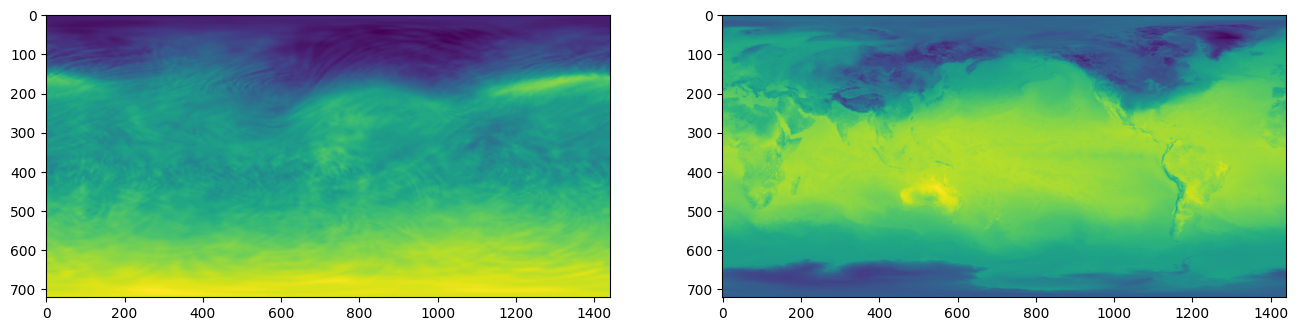

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.imshow(zarr_data[6])
ax2.imshow(data[6])

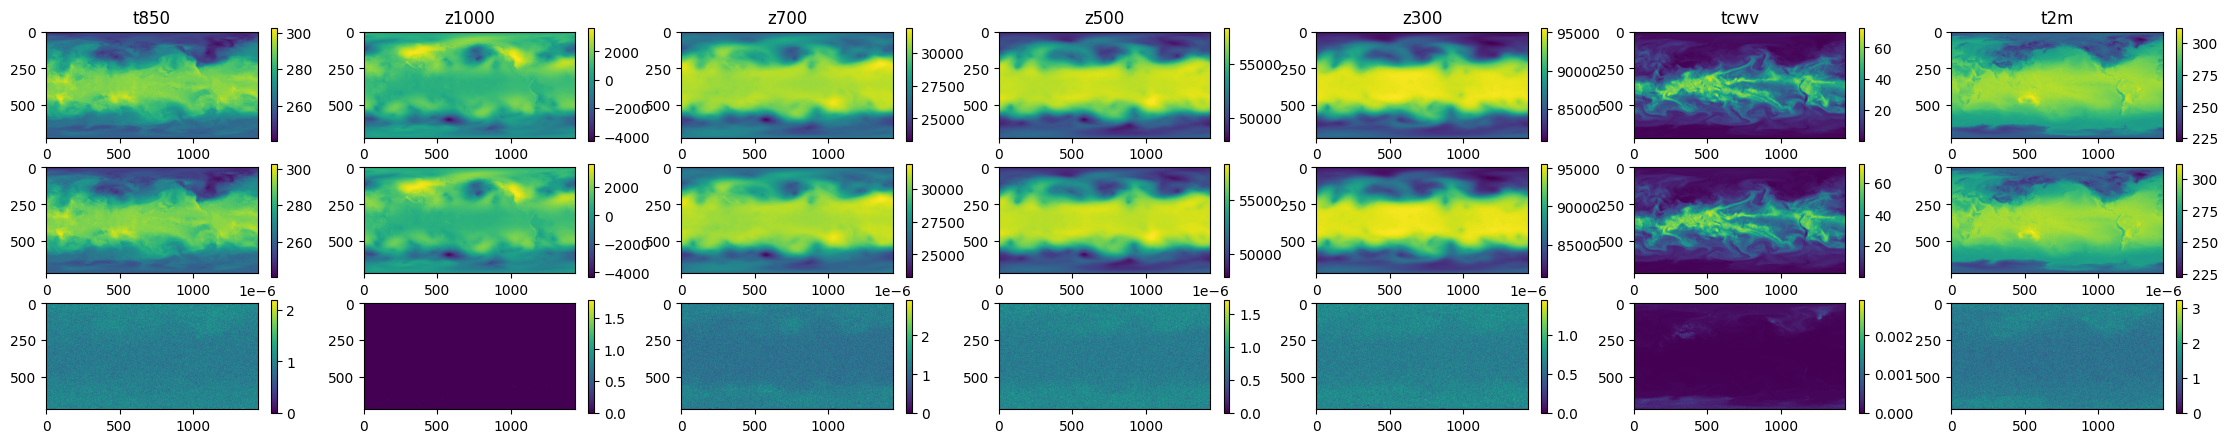

In [6]:
fig, axs = plt.subplots(3, len(dlwp_vars), figsize=(len(dlwp_vars) * 4, 5))
for i in range(len(dlwp_vars)):
    axs[0, i].set_title(dlwp_vars[i])
    cax = axs[0, i].imshow(data[i])
    fig.colorbar(cax, ax=axs[0, i])
    cax = axs[1, i].imshow(zarr_data[i])
    fig.colorbar(cax, ax=axs[1, i])
    cax = axs[2, i].imshow(np.abs(data[i] - zarr_data[i]) / np.abs(data[i]))
    fig.colorbar(cax, ax=axs[2, i])

In [29]:
for i in range(7):
    print(np.max(np.abs(data[i] - compressed_data[i])), np.max(np.abs(data[i])))

11.01434326171875 302.5964660644531
45.9364013671875 4339.89453125
33.85546875 31925.87109375
32.64453125 58377.35546875
31.890625 95586.125
5.960866928100586 72.36321067810059
5.5894775390625 311.9093017578125
